<a href="https://colab.research.google.com/github/D-kn/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset importation 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/'My Drive'/Colab Notebooks/Datasets

/content/drive/My Drive/Colab Notebooks/Datasets


In [ ]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Scipy: {}'.format(sp.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('matplotlib:{}'.format(matplotlib.__version__))
print('Sklearn:{}'.format(sklearn.__version__))


Python: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
Numpy: 1.19.5
Pandas: 1.1.5
Scipy: 1.4.1
Seaborn: 0.11.1
matplotlib:3.2.2
Sklearn:0.22.2.post1


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#Load the dataset from the csv file
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#Explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
print(data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


## For the 'Class' variable, the mean is close to 0. This means that there are larger number of valid transactions than fraudulent transactions. The dataset is highly unbalanced. 

## I want to use only a fraction of the dataset observations, since the dataset has very large number of rows. So let's sample the dataset.

In [ ]:
data=data.sample(frac=0.1,random_state=0)
print(data.shape)

(28481, 31)


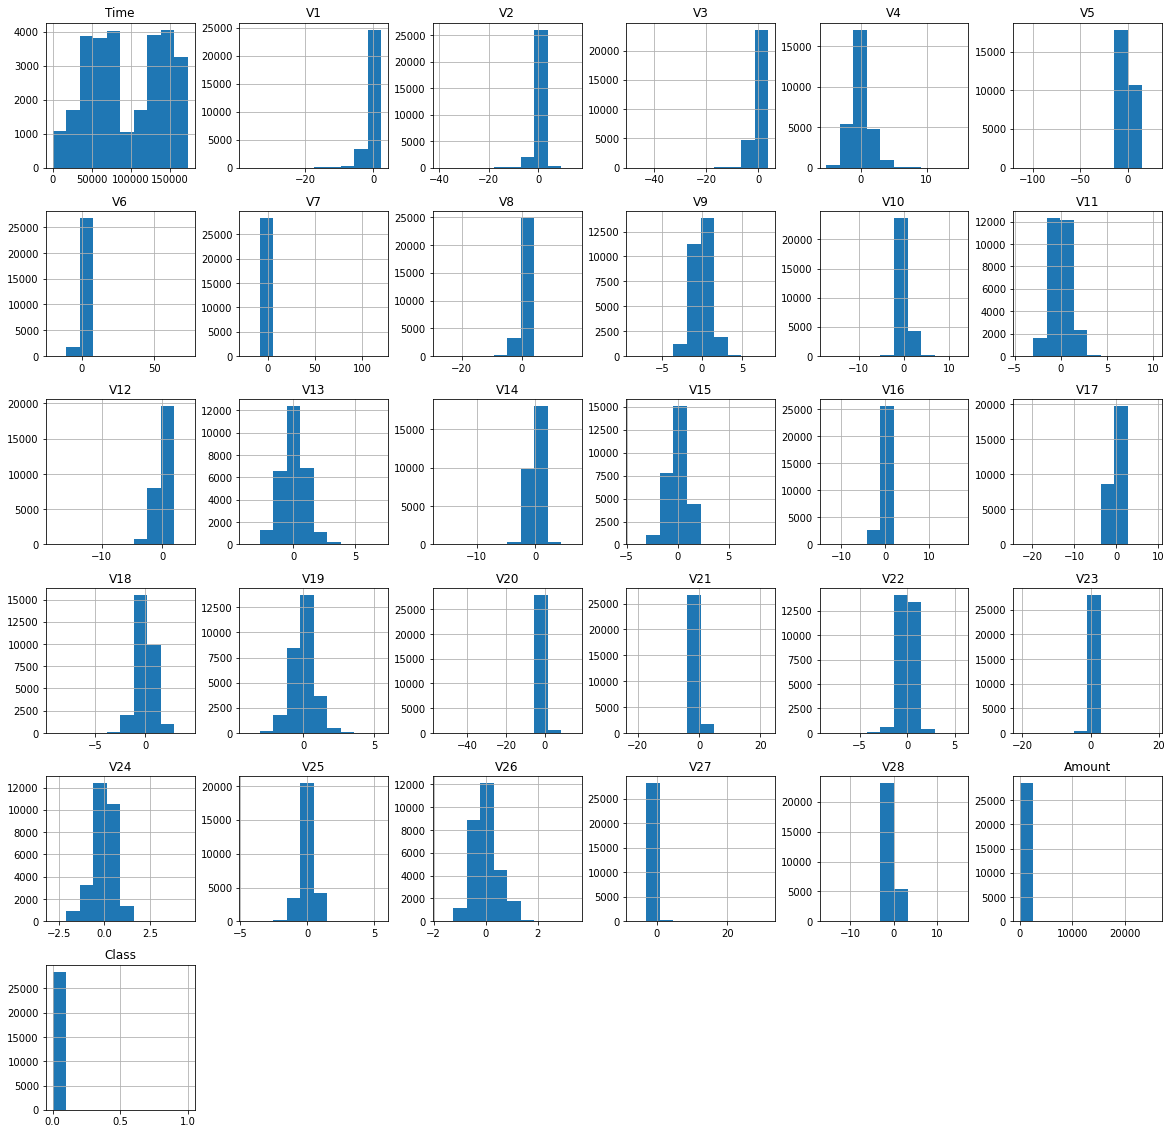

In [ ]:
#Plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [ ]:
#Determine number of fraud cases in dataset
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]
outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud cases:{}'.format(len(Fraud)))
print('Valid cases:{}'.format(len(Valid)))

0.0019348483782452685
Fraud cases:55
Valid cases:28426


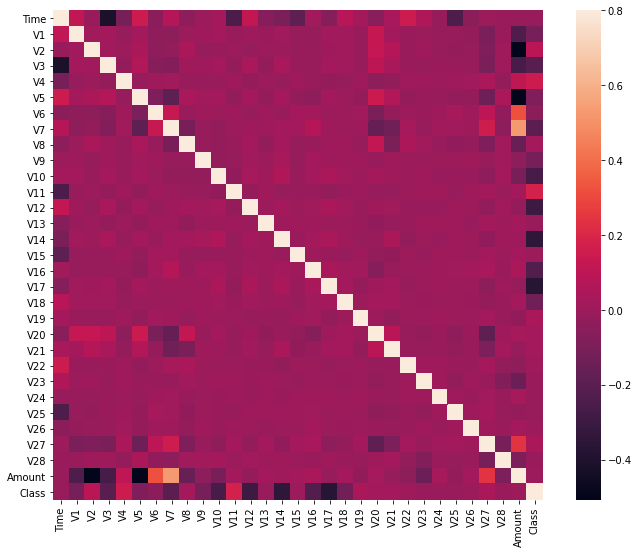

In [ ]:
#Correlation Matrix
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [ ]:
#Get all the columns from the dataframe
columns=data.columns.tolist()

#Filter the columns to remove data we do not want
columns=[c for c in columns if c not in ["Class"]]

#Store the variable we'll be predicting on
target="Class"

X=data[columns]
Y=data[target]

#Print the shapes of X and Y
print(X.shape)
print(Y.shape)


(28481, 30)
(28481,)


In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#Define a random state
state=1

#define the outlier detection methods
classifiers={
    "Isloation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,
                                      random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors=20,contamination=outlier_fraction)
}

In [ ]:
#Fit the model
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    
    #Reshape the prediction values to 0 for valid, 1 for fraud
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

n_errors=(y_pred!=Y).sum()

#Run the classification metrics 
print('{}:{}'.format(clf_name,n_errors))
print(accuracy_score(Y,y_pred))
print(classification_report(Y,y_pred))

Local Outlier Factor:109
0.9961728871879498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.02      0.02      0.02        55

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

